In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

In [2]:
dataset = pd.read_csv('data/Fresh_Air_Unit/FAU_Mumbai_Marketcity_Assets.csv')

In [3]:
dataset.head()

,Date,Location,Mall,Month,On_Off_Cmd,A/M_Status,Trip_Status,Run_Status,Schedule_Mode,Time_Schedule,Is_Weekend,Season,Climate_Prone,Outdoor_Temperature,Indoor_Temperature,Occupancy,Fan_Speed,Air_Filter,Air_Quality_PPM,Power_consumption_kwh
0,2021-01-01,Mumbai,Marketcity,1,ON,Auto,Normal,ON,Off,Off,0,Winter,Summer,24,22,307,Low,High,307,38
1,2021-01-02,Mumbai,Marketcity,1,ON,Auto,Trip,ON,Scheduled,Scheduled,1,Winter,Summer,23,24,434,Low,High,361,39
2,2021-01-03,Mumbai,Marketcity,1,ON,Auto,Normal,ON,Off,Off,1,Winter,Summer,21,23,499,Low,High,362,30
3,2021-01-04,Mumbai,Marketcity,1,ON,Auto,Normal,OFF,Off,Off,0,Winter,Summer,17,19,162,Low,Low,226,17
4,2021-01-05,Mumbai,Marketcity,1,ON,Auto,Normal,ON,Off,Off,0,Winter,Summer,24,21,234,Low,Medium,280,21


<AxesSubplot:>

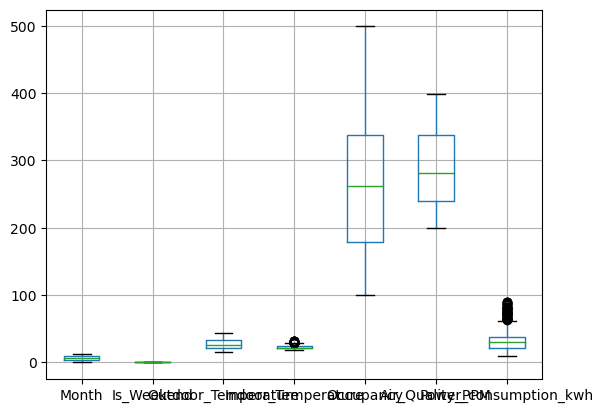

In [4]:
dataset.boxplot()

In [5]:
dataset = dataset[['Month','Outdoor_Temperature','Indoor_Temperature','Occupancy','Fan_Speed','Air_Filter','Air_Quality_PPM','Power_consumption_kwh']]

In [6]:
dataset.head()

,Month,Outdoor_Temperature,Indoor_Temperature,Occupancy,Fan_Speed,Air_Filter,Air_Quality_PPM,Power_consumption_kwh
0,1,24,22,307,Low,High,307,38
1,1,23,24,434,Low,High,361,39
2,1,21,23,499,Low,High,362,30
3,1,17,19,162,Low,Low,226,17
4,1,24,21,234,Low,Medium,280,21


In [7]:
def factorize_LMH(data):
    if data == 'Low':
        return 0
    elif data == 'Medium':
        return 1
    elif data == 'High':
        return 2

In [8]:
dataset['Fan_Speed'] = dataset['Fan_Speed'].apply(factorize_LMH)

In [9]:
dataset['Air_Filter'] = dataset['Air_Filter'].apply(factorize_LMH)

In [10]:
dataset.head()

,Month,Outdoor_Temperature,Indoor_Temperature,Occupancy,Fan_Speed,Air_Filter,Air_Quality_PPM,Power_consumption_kwh
0,1,24,22,307,0,2,307,38
1,1,23,24,434,0,2,361,39
2,1,21,23,499,0,2,362,30
3,1,17,19,162,0,0,226,17
4,1,24,21,234,0,1,280,21


In [11]:
y = dataset.iloc[:,-1]

In [12]:
y

0      38
1      39
2      30
3      17
4      21
       ..
725    34
726    13
727    14
728    23
729    39
Name: Power_consumption_kwh, Length: 730, dtype: int64

In [13]:
x = dataset.iloc[:, :-1]

In [14]:
x

,Month,Outdoor_Temperature,Indoor_Temperature,Occupancy,Fan_Speed,Air_Filter,Air_Quality_PPM
0,1,24,22,307,0,2,307
1,1,23,24,434,0,2,361
2,1,21,23,499,0,2,362
3,1,17,19,162,0,0,226
4,1,24,21,234,0,1,280
...,...,...,...,...,...,...,...
725,12,25,20,208,1,1,298
726,12,24,20,152,0,0,225
727,12,19,18,152,0,0,203
728,12,25,22,279,0,1,271


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scalar =  StandardScaler()

In [17]:
x = scalar.fit_transform(x)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.25)

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
rfr =  RandomForestRegressor()

In [22]:
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [23]:
y_pred = rfr.predict(x_test)

In [24]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [25]:
accuracy = r2_score(y_test, y_pred)

In [26]:
accuracy

0.8970810171698032

In [27]:
rfr.predict([[1,24,22,307,0,2,307]])

array([44.99])

In [28]:
y.iloc[:1]

0    38
Name: Power_consumption_kwh, dtype: int64

In [29]:
dataset['Prediction'] = rfr.predict(x)

In [30]:
import pickle

In [31]:
with open('models/FreshAirUnit.pkl', 'wb') as file:
    pickle.dump(rfr, file)

In [32]:
import joblib

In [33]:
with open('models/FreshAirUnit.joblib', 'wb') as file:
    joblib.dump(rfr, file)

In [34]:
with open('models/FAUScaler.bin', 'wb') as file:
    joblib.dump(scalar, file)

In [42]:
grid_params2 = [{'min_samples_leaf' : [1, 2, 4, 6, 8],
    'max_depth' : [0, 4, 6,8,9],
    'n_estimators': [10, 30, 50, 80, 100, 150],
    'max_depth': [1, 2, 4, 6, 8, 10],
    'min_samples_split': [1, 2, 4,5, 6, 8, ]
}]
rfr = RandomForestRegressor()
rfr_gcv = RandomizedSearchCV(estimator = rfr, param_distributions = grid_params2,n_iter = 500, cv = 5, verbose = 2)
rfr_gcv.fit(x_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
[CV] END max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.5s
[CV] END max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.5s
[CV] END max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=2

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=500,
                   param_distributions=[{'max_depth': [2, 4, 6, 8, 10],
                                         'min_samples_leaf': [1, 2, 4, 6, 8],
                                         'min_samples_split': [2, 4, 6, 8],
                                         'n_estimators': [10, 30, 50, 80, 100,
                                                          150]}],
                   verbose=2)

In [43]:
rfr_gcv.best_params_

{'n_estimators': 10,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_depth': 4}

In [44]:
best_rfr_estimator = rfr_gcv.best_estimator_
rfr_y_pred = best_rfr_estimator.predict(x_test)
mae = mean_absolute_error(y_test, rfr_y_pred)
r2 = r2_score(y_test, rfr_y_pred)
print('Random Forest Regressor Tuned')
print('R2 Score : ', r2)
print('Mean Absolute Error : ', mae)

Random Forest Regressor Tuned
R2 Score :  0.911786232402684
Mean Absolute Error :  3.4636841841642516


In [ ]:
0.9025349736963255

In [ ]:
0.911786232402684
{'n_estimators': 10,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_depth': 4}